# Metropolis of 1d XY model 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange

In [18]:
class XY_1D:
    def __init__(self, length, delta=0.1, beta=1, j = 1, periodic_cond=True, seed = 0):
        np.random.seed(seed)
        self.length = length
        self.delta = delta
        self.beta = beta
        self.j = j
        self.periodic_cond = periodic_cond
        self.grids_init()
        
    def grids_init(self):      
        self.grids = np.random.uniform(-np.pi, np.pi, self.length)
        
    def energy_compute_one_grid(self, id_grid, theta_grid):
        if self.periodic_cond:
            left_neibor = (id_grid - 1) % self.length
            right_neibor = (id_grid + 1) % self.length
            e_left = np.cos(self.grids[left_neibor] - theta_grid)
            e_right = np.cos(theta_grid - self.grids[right_neibor])
            energy = e_left + e_right
            return energy
        
        else:
            if id_grid == 0:
                return -self.j * np.cos(theta_grid - self.grids[id_grid+1])
            
            elif id_grid == self.length - 1:
                return -self.j * np.cos(theta_grid - self.grids[id_grid-1])
            
            else:
                e_left = -self.j * np.cos(self.grids[id_grid-1] - theta_grid)
                e_right = -self.j * np.cos(theta_grid - self.grids[id_grid+1])
                energy = e_left + e_right
                return energy
    
    def energy_compute_grids(self):
        energy_total = 0
        for i in range(self.length-1):
            energy_i = -self.j * np.cos(self.grids[i] - self.grids[i+1])
            energy_total += energy_i
        return energy_total
    
    def one_step_mcmc(self):
        id_random = np.random.randint(self.length)
        theta_id = self.grids[id_random]
        theta_random = np.random.normal(theta_id, self.delta)
        energy_old = self.energy_compute_one_grid(id_random, theta_id)
        energy_new = self.energy_compute_one_grid(id_random, theta_random)
        energy_delta = energy_new - energy_old
        prob_accept = min(np.exp(-self.beta * energy_delta), 1)
        if np.random.uniform(0, 1) < prob_accept:
            self.grids[id_random] = theta_random
            return energy_new
        else:
            return energy_old
            
    def mcmc(self, step, show_energy=True, show_plot=True, period=100, energy_accumu=False, folder_name=None):
        energy_list = []
        for i in trange(step):
            self.one_step_mcmc()
            energy_total = self.energy_compute_grids()
            energy_list.append(energy_total)
            print_template = "Step: {step} Energy: {energy}\t"
            if show_energy:
                print(print_template.format(step=i+1, energy=energy_total))  
            if show_plot and i % period == 0:
                self.spin_vis(save=True, step=i, folder_name=folder_name)
        if energy_accumu:
            return np.mean(energy_list)
            
    def spin_vis(self, figsize=(10, 3), save=False, step=None, folder_name=None):
        fig = plt.figure(figsize=figsize)
        x, y = np.meshgrid(np.arange(0, self.length), 0)
        u = np.cos(self.grids)
        v = np.sin(self.grids)
        q = plt.quiver(x, y, u, v, units='width')
        plt.axis('off')
        plt.title('T={:.3f}, spins={}'.format(1/self.beta, self.length), fontsize=10)
        if save and step is not None:
            plt.savefig(f'./{folder_name}/config_plot_step_{step}.pdf', dpi=100)
        plt.close(fig)

### Test of our model

In [48]:
# initialize the 1d xy model
length = 10
xy_1d = XY_1D(length, beta=20, j=1, periodic_cond=True)

In [49]:
# firing stage
xy_1d.mcmc(2000, show_energy=False, folder_name='firing')

In [60]:
# sampling stage
energy_list = []
for i in range(200):
    energy_list.append(xy_1d.mcmc(200, show_energy=False, show_plot=False, energy_accumu=True))

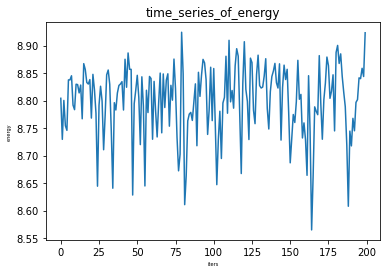

In [61]:
plt.title('time_series_of_energy')
plt.xlabel('iters', fontsize=5)
plt.ylabel('energy', fontsize=5)
plt.plot(energy_list)

In [63]:
xy_1d.mcmc(100, show_energy=True, period=2, show_plot=True, folder_name='sampling')

Step: 1 Energy: 8.797334673871998	
Step: 2 Energy: 8.797334673871998	
Step: 3 Energy: 8.799448811758078	
Step: 4 Energy: 8.762091891696882	
Step: 5 Energy: 8.747347890746326	
Step: 6 Energy: 8.747347890746326	
Step: 7 Energy: 8.66945351500938	
Step: 8 Energy: 8.74098323761561	
Step: 9 Energy: 8.738250462477927	
Step: 10 Energy: 8.725210962620157	
Step: 11 Energy: 8.721445894074682	
Step: 12 Energy: 8.738747554649052	
Step: 13 Energy: 8.732754677081894	
Step: 14 Energy: 8.735979638347182	
Step: 15 Energy: 8.729895659451191	
Step: 16 Energy: 8.736920080237262	
Step: 17 Energy: 8.737563951846973	
Step: 18 Energy: 8.740534834788681	
Step: 19 Energy: 8.740534834788681	
Step: 20 Energy: 8.722479235607667	
Step: 21 Energy: 8.722263810218294	
Step: 22 Energy: 8.739407031288444	
Step: 23 Energy: 8.757592186460837	
Step: 24 Energy: 8.757242350826537	
Step: 25 Energy: 8.755558164394666	
Step: 26 Energy: 8.769455892527922	
Step: 27 Energy: 8.769455892527922	
Step: 28 Energy: 8.819082534170594	
Ste